In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import shapiro, kstest
import statsmodels.api as sm

In [5]:
# Load the dataset
df= pd.read_csv('/kaggle/input/world-population-by-country-2024/World Population by country 2024.csv') 


In [6]:
df.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306,5


In [7]:
df.tail()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
229,Montserrat,4372,4386,102,43.00,-0.0032,NaN,230
230,Falkland Islands,3803,3791,12.2K,0.31,0.0032,NaN,231
231,Niue,1935,1935,261,7.00,0.0000,NaN,232
232,Tokelau,1915,1893,10,192.00,0.0116,NaN,233
233,Vatican City,526,518,< 1,1195.00,0.0154,NaN,234


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Population 2024  234 non-null    int64  
 2   Population 2023  234 non-null    int64  
 3   Area (km2)       234 non-null    object 
 4   Density (/km2)   234 non-null    float64
 5   Growth Rate      234 non-null    float64
 6   World %          228 non-null    float64
 7   World Rank       234 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 14.8+ KB


In [9]:
df.shape

(234, 8)

In [10]:
print(df.columns)

Index(['Country', 'Population 2024', 'Population 2023', 'Area (km2)',
       'Density (/km2)', 'Growth Rate', 'World %', 'World Rank'],
      dtype='object')


In [11]:
df.describe()

,Population 2024,Population 2023,Density (/km2),Growth Rate,World %,World Rank
count,2.340000e+02,2.340000e+02,234.000000,234.000000,228.000000,234.000000
mean,3.468862e+07,3.437442e+07,453.788248,0.009200,0.004446,117.500000
std,1.380750e+08,1.373864e+08,1990.163274,0.011371,0.017459,67.694165
min,5.260000e+02,5.180000e+02,0.140000,-0.030900,0.000000,1.000000
25%,4.264565e+05,4.225982e+05,39.500000,0.001925,0.000100,59.250000
50%,5.626359e+06,5.643895e+06,98.500000,0.007950,0.000750,117.500000
75%,2.392272e+07,2.324537e+07,248.250000,0.015675,0.003000,175.750000
max,1.441720e+09,1.428628e+09,21674.000000,0.048300,0.180100,234.000000


In [12]:
df.isna().sum()

Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            6
World Rank         0
dtype: int64

In [13]:
# Convert 'Area (km2)' to numerical values
def convert_area(area):
    if isinstance(area, str):
        area = area.strip().replace('<', '').strip()  # Remove any '<' characters
        if 'M' in area:
            return float(area.replace('M', '')) * 1_000_000
        elif 'K' in area:
            return float(area.replace('K', '')) * 1_000
        else:
            return float(area)
    return area

df['Area (km2)'] = df['Area (km2)'].apply(convert_area)


In [14]:
median_value = df['World %'].median(skipna=True)
df.loc[df['World %'].isnull(), 'World %'] = median_value
df_clean= df.copy()

In [15]:
df_clean.isna().sum()

Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            0
World Rank         0
dtype: int64

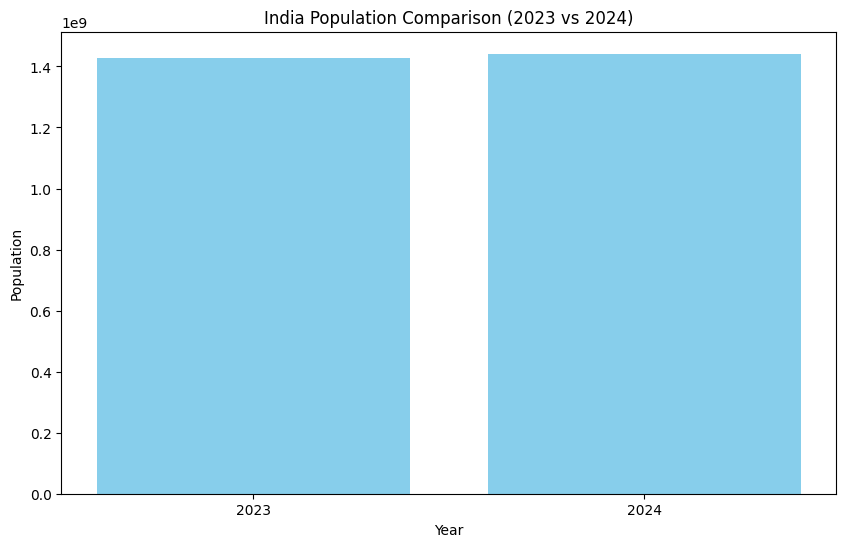

In [16]:
# Visualize India's population in 2023 and 2024
plt.figure(figsize=(10, 6))
plt.bar(['2023', '2024'], [1428627663, 1441719852], color='skyblue')
plt.title('India Population Comparison (2023 vs 2024)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()


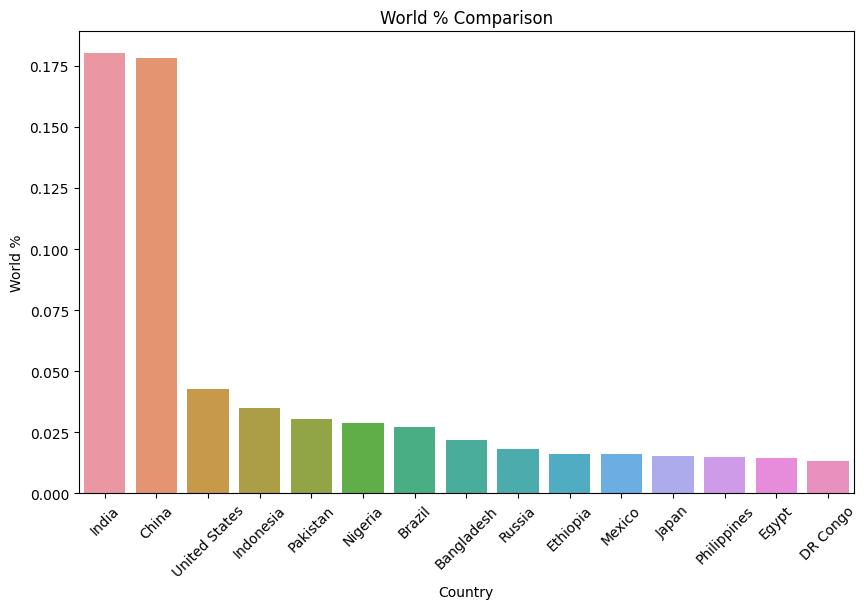

In [17]:
# Bar plot for World % comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='World %', data=df_clean.head(15))  # Top 10 countries by World %
plt.title('World % Comparison')
plt.xlabel('Country')
plt.ylabel('World %')
plt.xticks(rotation=45)
plt.show()

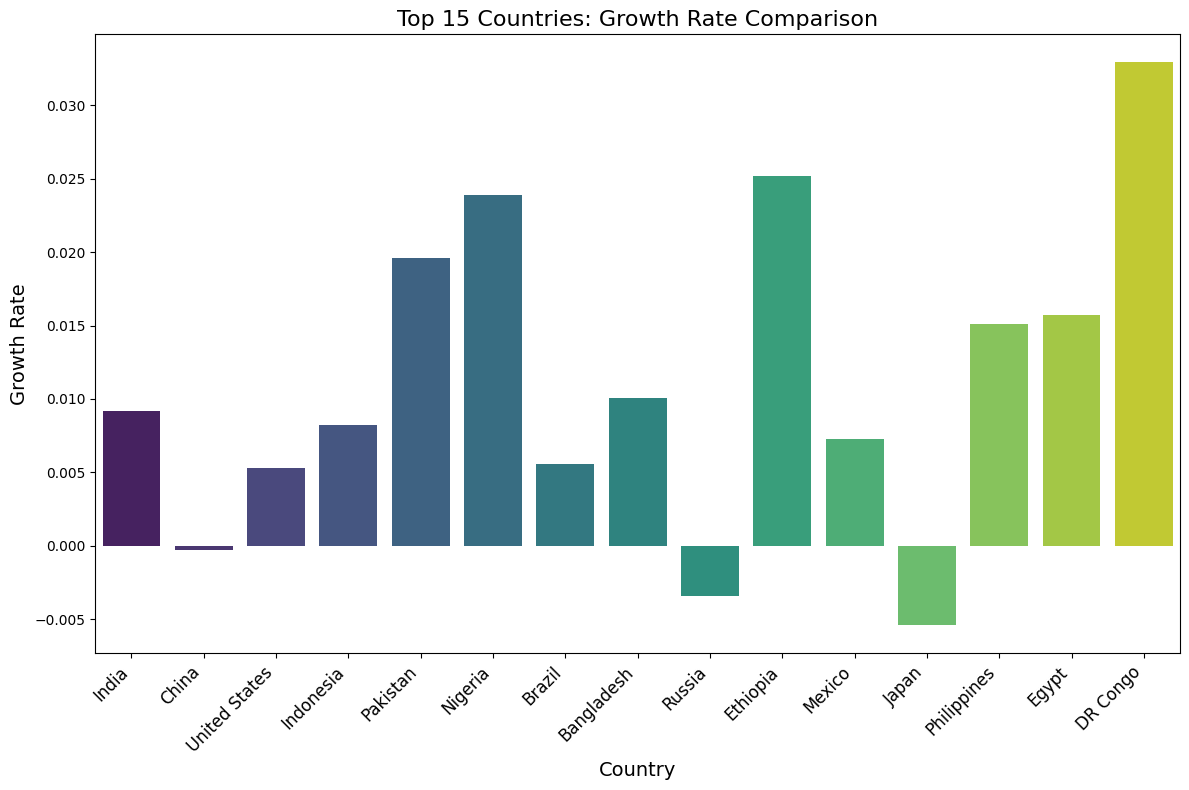

In [18]:
# Sort the dataframe by 'Population 2024' in descending order and select top 15
top_countries = df_clean.sort_values(by='Population 2024', ascending=False).head(15)

plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Use seaborn barplot with the top 15 countries
ax = sns.barplot(x='Country', y='Growth Rate', data=top_countries, palette='viridis')
ax.set_title('Top 15 Countries: Growth Rate Comparison', fontsize=16)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Growth Rate', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [19]:
from scipy.stats import mannwhitneyu

# Example: Perform Mann-Whitney U test between Population 2023 and 2024
statistic, p_value = mannwhitneyu(df_clean['Population 2023'], df_clean['Population 2024'])

print(f"Mann-Whitney U Test Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between Population 2023 and Population 2024.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between Population 2023 and Population 2024.")


Mann-Whitney U Test Statistic: 27238.5
P-value: 0.9243010036847636
Fail to reject null hypothesis: There is no significant difference between Population 2023 and Population 2024.


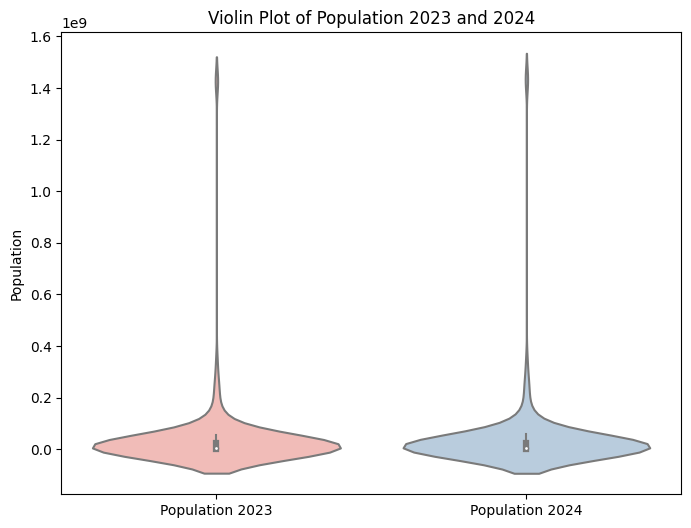

In [20]:
# Violin plot for Population 2023 and 2024
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_clean[['Population 2023', 'Population 2024']], palette='Pastel1')
plt.title('Violin Plot of Population 2023 and 2024')
plt.ylabel('Population')
plt.show()


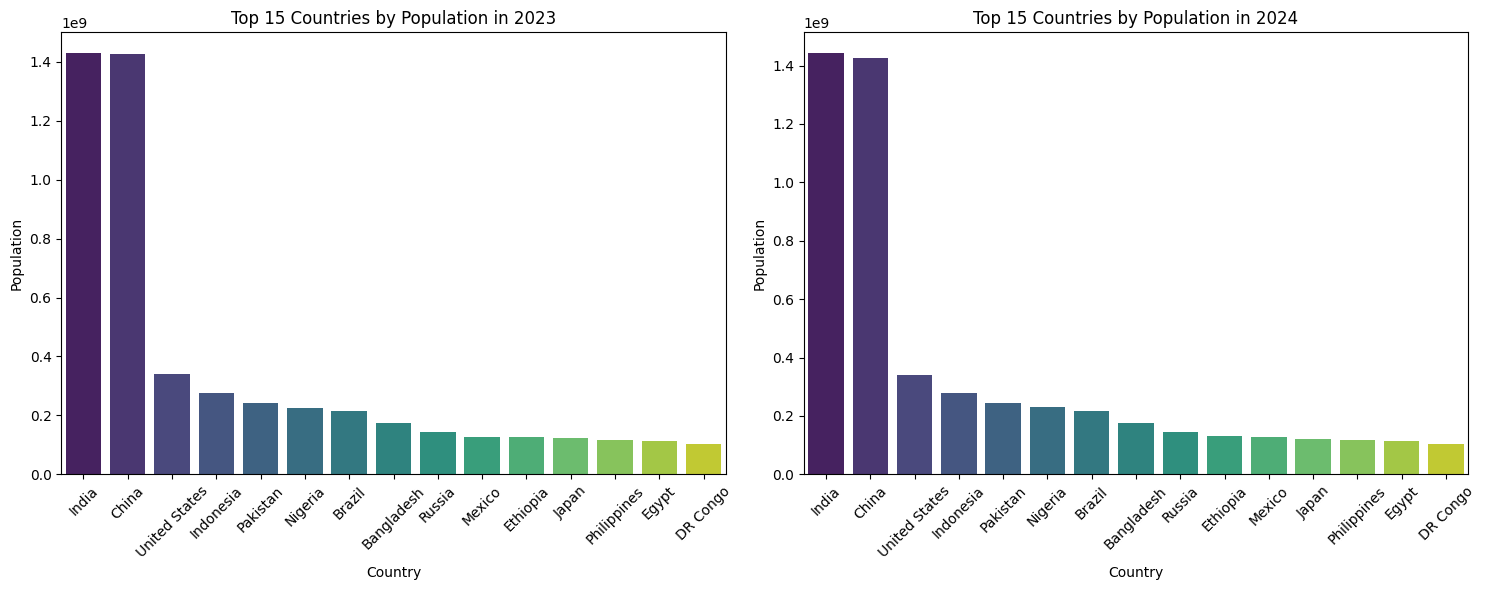

In [21]:
# Sort the dataframe by Population 2023 and select top 15 countries
top_15_2023 = df_clean.sort_values(by='Population 2023', ascending=False).head(15)

# Sort the dataframe by Population 2024 and select top 15 countries
top_15_2024 = df_clean.sort_values(by='Population 2024', ascending=False).head(15)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for 2023
sns.barplot(x='Country', y='Population 2023', data=top_15_2023, palette='viridis', ax=ax1)
ax1.set_title('Top 15 Countries by Population in 2023')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel('Population')

# Plot for 2024
sns.barplot(x='Country', y='Population 2024', data=top_15_2024, palette='viridis', ax=ax2)
ax2.set_title('Top 15 Countries by Population in 2024')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_ylabel('Population')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


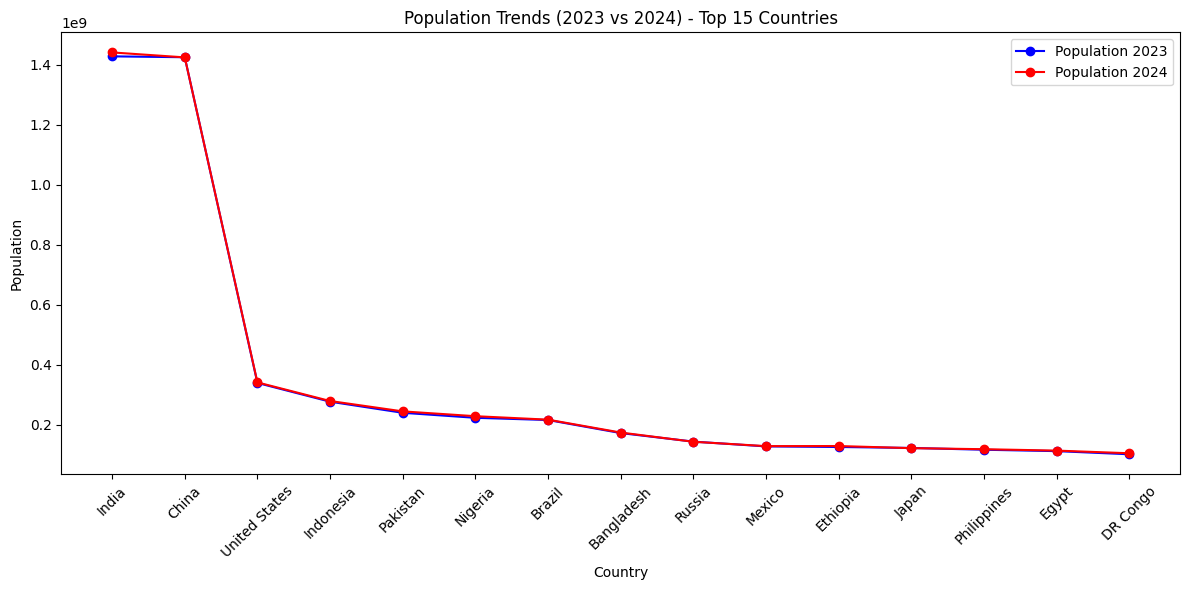

In [22]:
# Assuming df is your DataFrame containing 'Country', 'Population 2023', and 'Population 2024'

# Sort by Population 2023 to get top 15 countries
top_15_countries = df_clean.nlargest(15, 'Population 2023')

plt.figure(figsize=(12, 6))
plt.plot(top_15_countries['Country'], top_15_countries['Population 2023'], marker='o', linestyle='-', color='b', label='Population 2023')
plt.plot(top_15_countries['Country'], top_15_countries['Population 2024'], marker='o', linestyle='-', color='r', label='Population 2024')
plt.title('Population Trends (2023 vs 2024) - Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
import numpy as np

# Calculate correlation matrix
correlation_matrix = df_clean[['Population 2023', 'Population 2024', 'Area (km2)', 'Density (/km2)', 'Growth Rate', 'World %', 'World Rank']].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 Population 2023  Population 2024  Area (km2)  Density (/km2)  \
Population 2023         1.000000         0.999982    0.453099       -0.026480   
Population 2024         0.999982         1.000000    0.452128       -0.026603   
Area (km2)              0.453099         0.452128    1.000000       -0.065132   
Density (/km2)         -0.026480        -0.026603   -0.065132        1.000000   
Growth Rate            -0.001058         0.001155    0.015870       -0.071190   
World %                 0.999958         0.999975    0.451958       -0.026692   
World Rank             -0.359633        -0.360910   -0.392956        0.130506   

                 Growth Rate   World %  World Rank  
Population 2023    -0.001058  0.999958   -0.359633  
Population 2024     0.001155  0.999975   -0.360910  
Area (km2)          0.015870  0.451958   -0.392956  
Density (/km2)     -0.071190 -0.026692    0.130506  
Growth Rate         1.000000  0.000569   -0.276460  
World %      

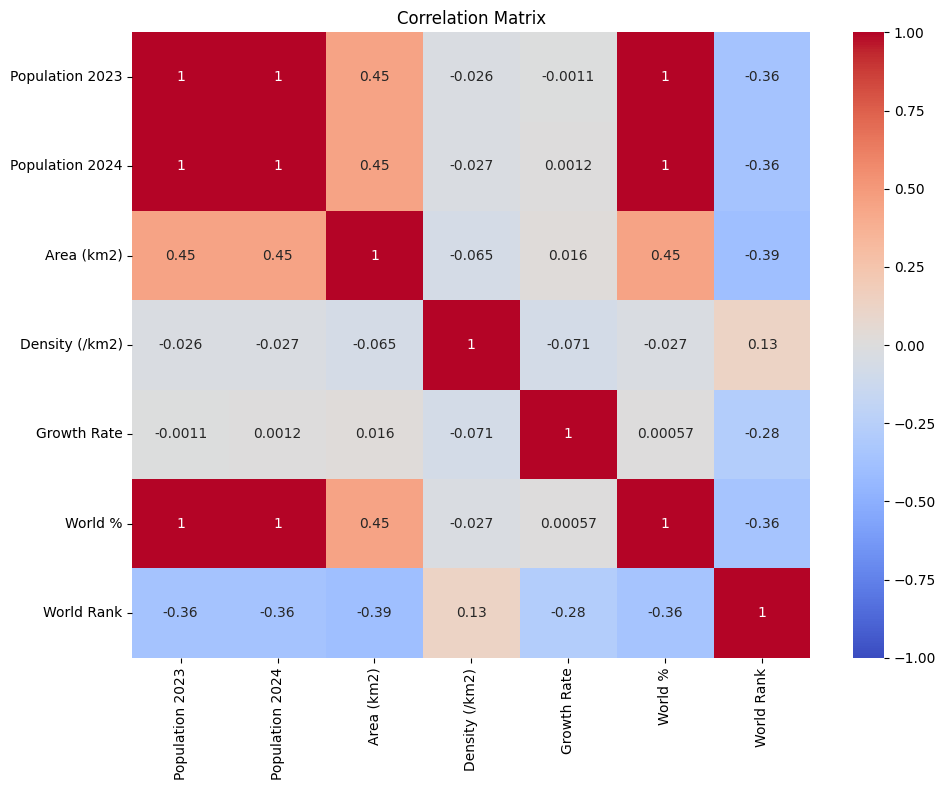

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


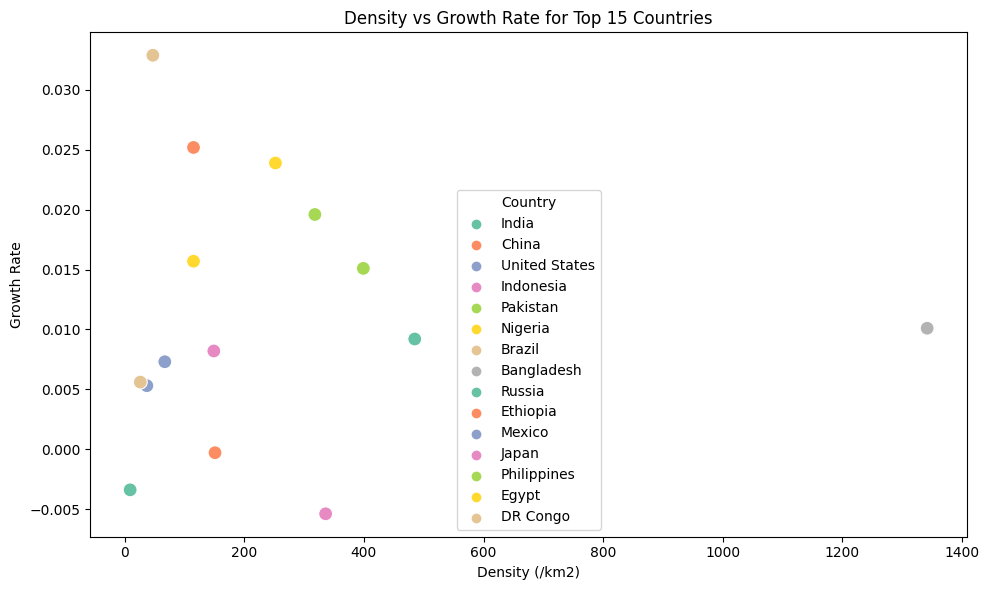

In [25]:
# Sort the dataframe by Population 2023 and select top 15 countries
top_15_countries = df_clean.sort_values(by='Population 2023', ascending=False).head(15)['Country']

# Filter the dataframe to include only the top 15 countries
df_top_15 = df_clean[df_clean['Country'].isin(top_15_countries)]

# Plot density versus growth rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density (/km2)', y='Growth Rate', data=df_top_15, hue='Country', palette='Set2', s=100)
plt.title('Density vs Growth Rate for Top 15 Countries')
plt.xlabel('Density (/km2)')
plt.ylabel('Growth Rate')
plt.tight_layout()
plt.show()


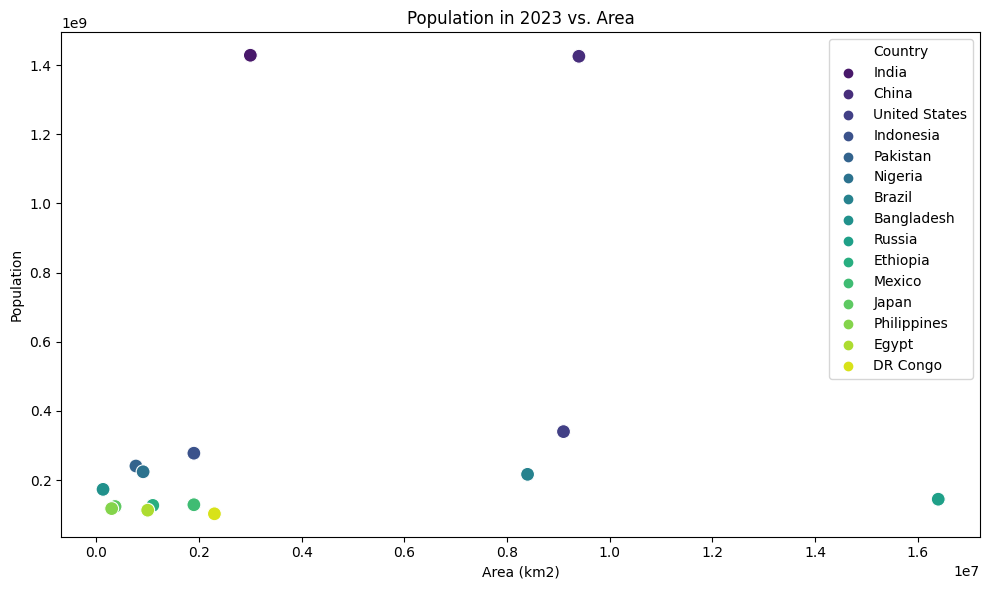

In [26]:
# Sort the dataframe by Population 2023 and select top 15 countries
top_15_countries = df_clean.sort_values(by='Population 2023', ascending=False).head(15)['Country']

# Filter the dataframe to include only the top 15 countries
df_top_15 = df_clean[df_clean['Country'].isin(top_15_countries)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area (km2)', y='Population 2023', data=df_top_15, hue='Country', palette='viridis', s=100)
plt.title('Population in 2023 vs. Area')
plt.xlabel('Area (km2)')
plt.ylabel('Population')
plt.tight_layout()
plt.show()


In [27]:
India= df[df['Country'] == 'India']
India

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3000000.0,485.0,0.0092,0.1801,1


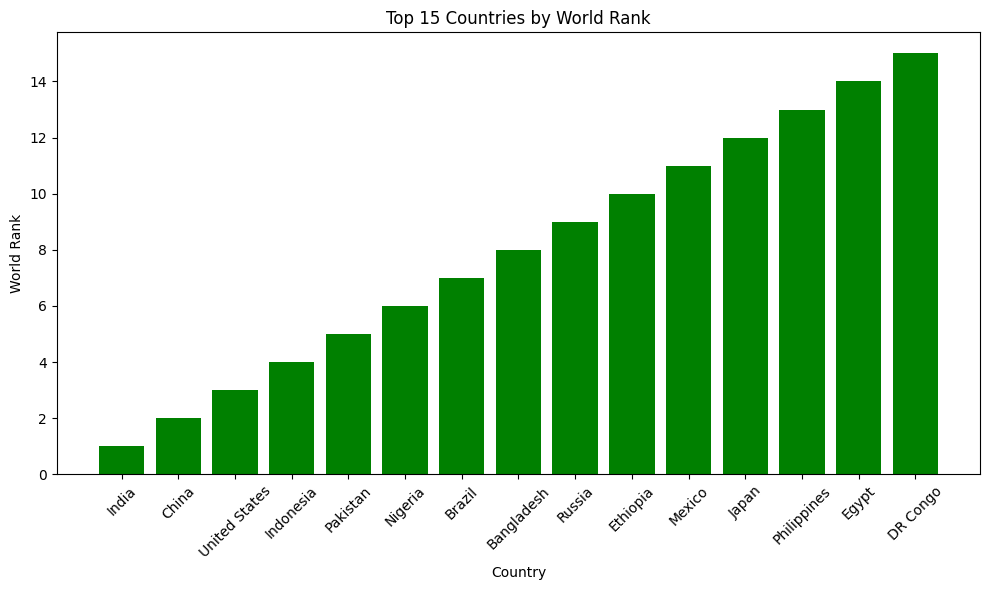

In [28]:

# Assuming df_clean is your dataframe
# Sort dataframe by 'World Rank' and select top 15 countries
top_15_countries = df_clean.sort_values(by='World Rank').head(15)

plt.figure(figsize=(10, 6))
plt.bar(top_15_countries['Country'], top_15_countries['World Rank'], color='green')
plt.xlabel('Country')
plt.ylabel('World Rank')
plt.title('Top 15 Countries by World Rank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
